In [128]:
#Importing packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

Oppgave 2
We will generate our own dataset for a function  𝑦(𝑥)  where  𝑥∈[0,1]  and defined by random numbers computed with the uniform distribution. The function  𝑦  is a quadratic polynomial in  𝑥  with added stochastic noise according to the normal distribution  (0,1) . The following simple Python instructions define our  𝑥  and  𝑦  values (with 100 data points).

In [115]:
np.random.seed()

In [129]:

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)
print(x)

[0.78810879 0.82759903 0.56609141 0.51833477 0.15642255 0.84749654
 0.1558533  0.30210471 0.68939819 0.65485303 0.91560447 0.36049976
 0.12514367 0.04807179 0.63352953 0.45747214 0.00849882 0.63792753
 0.15898794 0.47159167 0.51374046 0.9818635  0.73076985 0.40358489
 0.96632959 0.40116632 0.6462277  0.84693508 0.24174451 0.23526654
 0.29050838 0.82600084 0.13759164 0.31175434 0.59147779 0.97369658
 0.68460464 0.61452577 0.24016387 0.86072086 0.95568379 0.45033172
 0.00687964 0.23229182 0.87793054 0.1349485  0.40078535 0.76189854
 0.59005226 0.7707449  0.25771171 0.2459864  0.95509997 0.18510507
 0.320285   0.26568302 0.79015569 0.38775962 0.61012939 0.68745957
 0.16665803 0.08930113 0.47074618 0.92153971 0.74017325 0.27024206
 0.39273997 0.59988331 0.97171933 0.23531398 0.63946733 0.00702962
 0.49785225 0.75478844 0.14130304 0.35660203 0.43029473 0.05369167
 0.8145506  0.61575375 0.15958155 0.691238   0.46523444 0.01712762
 0.01677074 0.57629644 0.40766966 0.60716421 0.45175271 0.9743

In [130]:
#Funksjoner for RSquared og MSE
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n
#,random_state=11

In [131]:
# Our Own code
#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),3))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2
print(X.shape)
# We split the data in test and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

(100, 3)
[2.01184384 0.02219125 4.95609603]
Training R2
0.9953127315134849
Training MSE
0.009903658996799139
Test R2
0.9947177447767446
Test MSE
0.015220611005434464


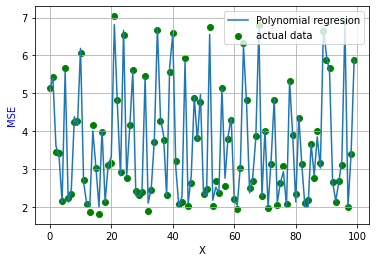

In [132]:
h = range(0,len(X))
y_reg = X @ beta


fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('MSE',color ="b")
ax.plot(h, y_reg , label='Polynomial regresion')
ax.scatter(h, y, color='green',label="actual data")
plt.grid()

leg = ax.legend();

In [ ]:
#cheking if X and polyfit is equal


In [141]:
# Using sklearn library to see

poly = PolynomialFeatures(2)
X_ = poly.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2)
regr = linear_model.LinearRegression()
regr.fit(X_train_s, y_train_s)
y_pred_sklearn = regr.predict(X_test_s)




Coefficients: 
 [ 0.         -0.10022196  5.11874419]
Mean squared error: 0.01
Coefficient of determination: 1.00


ValueError: x and y must be the same size

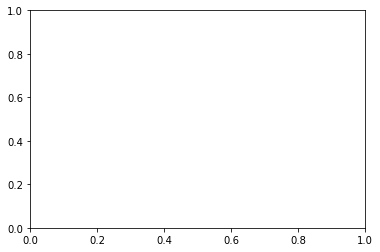

In [143]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_s, y_pred_sklearn))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test_s, y_pred_sklearn))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred_sklearn, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
#skriv noe her